In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set styling
sns.set_style('whitegrid')
sns.set_palette('Set2')
plt.rcParams['figure.figsize'] = (14, 7)

print("✅ Libraries imported successfully")

✅ Libraries imported successfully


In [2]:
# Load Featured Data
df = pd.read_csv('featured_real_estate_data.csv')

print(f"📁 Dataset loaded: {df.shape[0]} rows × {df.shape[1]} columns")
print("\n📈 Basic Statistics:")
print(df[['Price_Lakhs', 'Area_SqFt', 'BHK', 'Price_Per_SqFt']].describe())
df.head()

📁 Dataset loaded: 2247 rows × 28 columns

📈 Basic Statistics:
       Price_Lakhs    Area_SqFt          BHK  Price_Per_SqFt
count  2247.000000  2247.000000  2247.000000     2247.000000
mean     91.279306  1269.006231     2.531820     8399.514807
std      73.002212   741.475469     0.839655     9035.303973
min      15.000000    86.000000     1.000000      414.269275
25%      48.000000   794.000000     2.000000     4789.272031
50%      69.800000  1106.000000     3.000000     6444.444444
75%     105.000000  1530.000000     3.000000     8825.889907
max     555.000000  4550.000000     8.000000   154676.258993


,Property Title,Price,Area,BHK,Bathrooms,Furnishing,Seller Type,Locality,City,Source,...,Locality_Property_Count,Bathroom_BHK_Ratio,Area_Per_Bedroom,Space_Quality,Furnishing_Encoded,Area_Category_Encoded,Property_Type_Encoded,Price_Segment_Encoded,Space_Quality_Encoded,Is_Top_Locality
0,"4 BHK Flat for Sale in Ashima The Sovereign, T...",₹4.34 Cr,3187 sqft,4.0,NaN,Unfurnished,Builder,"Ashima The Sovereign, Thaltej, Ahmedabad",Ahmedabad,MagicBricks,...,1,NaN,796.750000,Spacious,2,0,2,2,1,0
1,"4 BHK Flat for Sale in Satyamev Luxor, Ambli, ...",₹3.04 Cr,2327 sqft,4.0,NaN,Unfurnished,Agent,"Satyamev Luxor, Ambli, Ahmedabad",Ahmedabad,MagicBricks,...,2,NaN,581.750000,Standard,2,1,2,2,2,0
2,"4 BHK Flat for Sale in Super Shaligram, Gota, ...",₹1.82 Cr,3445 sqft,4.0,NaN,Unfurnished,Agent,"Super Shaligram, Gota, Ahmedabad",Ahmedabad,MagicBricks,...,1,NaN,861.250000,Very Spacious,2,0,2,3,3,0
3,"3 BHK Flat for Sale in Serenity Shivam, South ...",₹71.8 Lac,1795 sqft,3.0,NaN,Unfurnished,Agent,"Serenity Shivam, South Bopal, Bopal, Ahmedabad",Ahmedabad,MagicBricks,...,3,NaN,598.333333,Standard,2,1,1,0,2,0
4,2 BHK Flat for Sale in Om The Green Parmeshwar...,₹68 Lac,1458 sqft,2.0,NaN,Unfurnished,Agent,"Om The Green Parmeshwar, Jagatpur, Ahmedabad",Ahmedabad,MagicBricks,...,2,NaN,729.000000,Spacious,2,2,0,0,1,0


## 📊 Visualization 1: Price Distribution Analysis

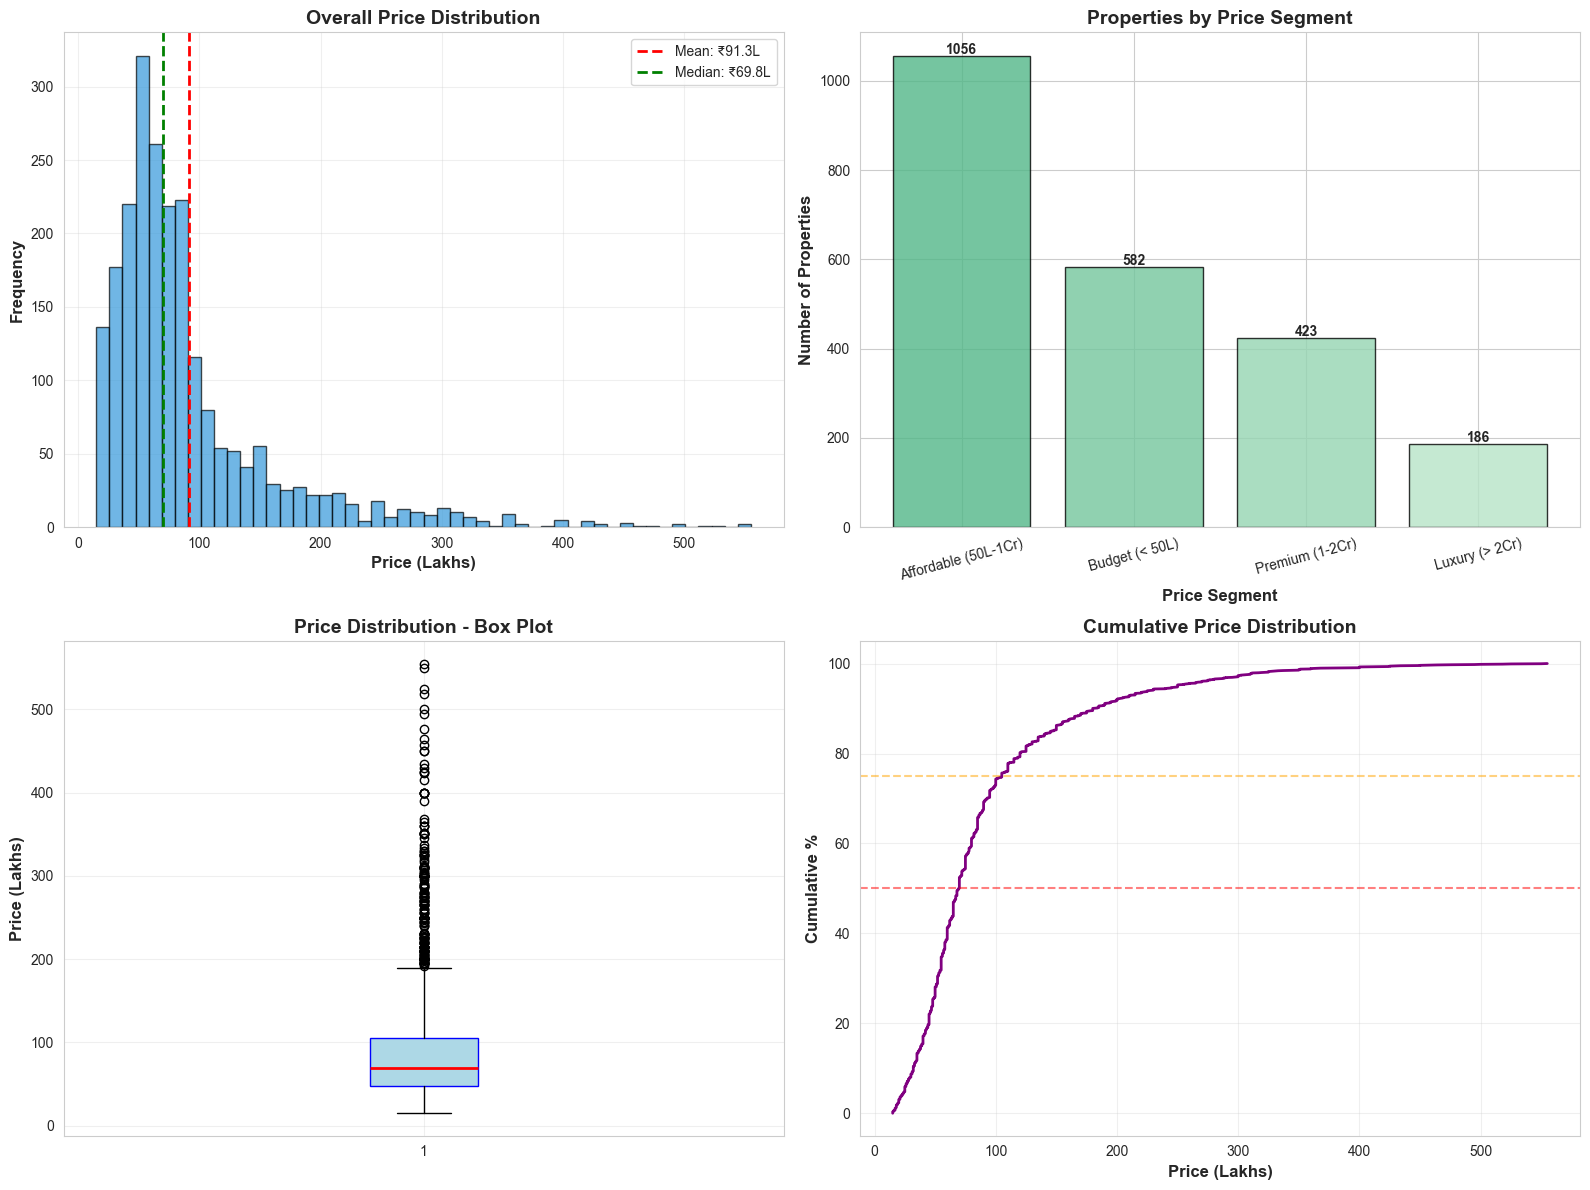

✅ Visualization 1 completed


In [3]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Price Distribution Histogram
axes[0, 0].hist(df['Price_Lakhs'], bins=50, color='#3498db', edgecolor='black', alpha=0.7)
axes[0, 0].axvline(df['Price_Lakhs'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: ₹{df["Price_Lakhs"].mean():.1f}L')
axes[0, 0].axvline(df['Price_Lakhs'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: ₹{df["Price_Lakhs"].median():.1f}L')
axes[0, 0].set_xlabel('Price (Lakhs)', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[0, 0].set_title('Overall Price Distribution', fontsize=14, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Price Segment Distribution
segment_counts = df['Price_Segment'].value_counts()
colors = ['#52B788', '#74C69D', '#95D5B2', '#B7E4C7']
axes[0, 1].bar(segment_counts.index, segment_counts.values, color=colors, edgecolor='black', alpha=0.8)
axes[0, 1].set_xlabel('Price Segment', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Number of Properties', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Properties by Price Segment', fontsize=14, fontweight='bold')
axes[0, 1].tick_params(axis='x', rotation=15)
for i, v in enumerate(segment_counts.values):
    axes[0, 1].text(i, v + 5, str(v), ha='center', fontweight='bold')

# 3. Price Box Plot
axes[1, 0].boxplot(df['Price_Lakhs'], vert=True, patch_artist=True,
                   boxprops=dict(facecolor='lightblue', color='blue'),
                   medianprops=dict(color='red', linewidth=2))
axes[1, 0].set_ylabel('Price (Lakhs)', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Price Distribution - Box Plot', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# 4. Cumulative Distribution
sorted_prices = np.sort(df['Price_Lakhs'])
cumulative = np.arange(1, len(sorted_prices) + 1) / len(sorted_prices) * 100
axes[1, 1].plot(sorted_prices, cumulative, color='purple', linewidth=2)
axes[1, 1].set_xlabel('Price (Lakhs)', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Cumulative %', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Cumulative Price Distribution', fontsize=14, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].axhline(50, color='red', linestyle='--', alpha=0.5)
axes[1, 1].axhline(75, color='orange', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig('01_price_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Visualization 1 completed")

## 📐 Visualization 2: Area vs Price Analysis

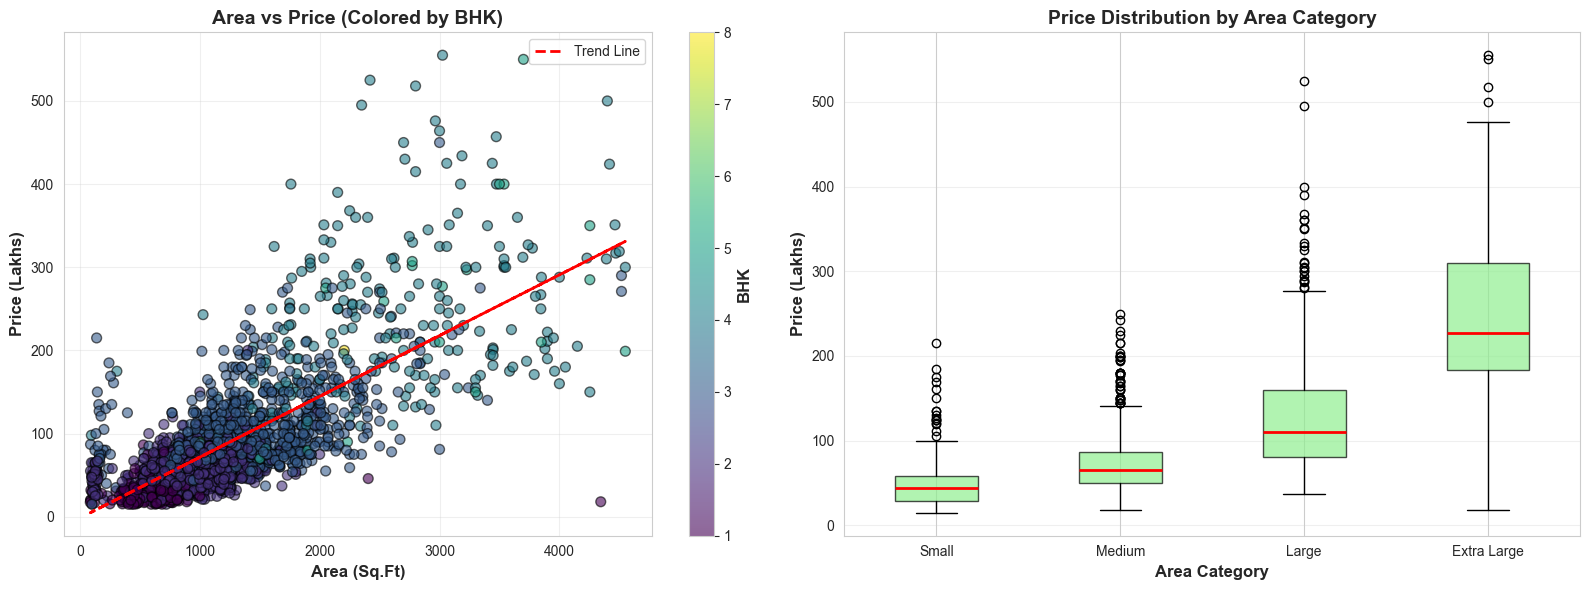

✅ Visualization 2 completed


In [4]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Scatter Plot: Area vs Price
scatter = axes[0].scatter(df['Area_SqFt'], df['Price_Lakhs'], 
                         c=df['BHK'], cmap='viridis', alpha=0.6, s=50, edgecolors='black')
axes[0].set_xlabel('Area (Sq.Ft)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Price (Lakhs)', fontsize=12, fontweight='bold')
axes[0].set_title('Area vs Price (Colored by BHK)', fontsize=14, fontweight='bold')
cbar = plt.colorbar(scatter, ax=axes[0])
cbar.set_label('BHK', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Add regression line
z = np.polyfit(df['Area_SqFt'], df['Price_Lakhs'], 1)
p = np.poly1d(z)
axes[0].plot(df['Area_SqFt'], p(df['Area_SqFt']), "r--", linewidth=2, label='Trend Line')
axes[0].legend()

# 2. Box Plot: Price by Area Category
area_order = ['Small', 'Medium', 'Large', 'Extra Large']
df_plot = df[df['Area_Category'].isin(area_order)]
box_data = [df_plot[df_plot['Area_Category'] == cat]['Price_Lakhs'].values for cat in area_order]
bp = axes[1].boxplot(box_data, labels=area_order, patch_artist=True,
                     boxprops=dict(facecolor='lightgreen', alpha=0.7),
                     medianprops=dict(color='red', linewidth=2))
axes[1].set_xlabel('Area Category', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Price (Lakhs)', fontsize=12, fontweight='bold')
axes[1].set_title('Price Distribution by Area Category', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('02_area_vs_price.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Visualization 2 completed")

## 🏙️ Visualization 3: Top Localities Analysis

In [5]:
# Top 15 localities by average price
top_localities = df.groupby('Locality').agg({
    'Price_Lakhs': 'mean',
    'Property_Title': 'count'
}).rename(columns={'Property_Title': 'Count'}).sort_values('Price_Lakhs', ascending=False).head(15)

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# 1. Top 15 Expensive Localities
bars = axes[0].barh(top_localities.index, top_localities['Price_Lakhs'], color='coral', edgecolor='black')
axes[0].set_xlabel('Average Price (Lakhs)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Locality', fontsize=12, fontweight='bold')
axes[0].set_title('Top 15 Most Expensive Localities', fontsize=14, fontweight='bold')
axes[0].invert_yaxis()
for i, (idx, row) in enumerate(top_localities.iterrows()):
    axes[0].text(row['Price_Lakhs'] + 2, i, f"₹{row['Price_Lakhs']:.1f}L ({int(row['Count'])} props)", 
                va='center', fontsize=9)

# 2. Top 15 Most Active Localities (by property count)
most_active = df['Locality'].value_counts().head(15)
axes[1].barh(most_active.index, most_active.values, color='skyblue', edgecolor='black')
axes[1].set_xlabel('Number of Properties', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Locality', fontsize=12, fontweight='bold')
axes[1].set_title('Top 15 Most Active Localities', fontsize=14, fontweight='bold')
axes[1].invert_yaxis()
for i, (idx, val) in enumerate(most_active.items()):
    axes[1].text(val + 1, i, str(val), va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.savefig('03_top_localities.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Visualization 3 completed")

KeyError: "Column(s) ['Property_Title'] do not exist"

## 🏠 Visualization 4: BHK Configuration Analysis

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. BHK Distribution
bhk_counts = df['BHK'].value_counts().sort_index()
axes[0, 0].bar(bhk_counts.index, bhk_counts.values, color='teal', edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('BHK', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Number of Properties', fontsize=12, fontweight='bold')
axes[0, 0].set_title('Property Distribution by BHK', fontsize=14, fontweight='bold')
for i, v in enumerate(bhk_counts.values):
    axes[0, 0].text(bhk_counts.index[i], v + 10, str(v), ha='center', fontweight='bold')

# 2. Average Price by BHK
avg_price_bhk = df.groupby('BHK')['Price_Lakhs'].mean().sort_index()
axes[0, 1].plot(avg_price_bhk.index, avg_price_bhk.values, marker='o', linewidth=3, 
               markersize=10, color='purple', markerfacecolor='yellow', markeredgecolor='purple', markeredgewidth=2)
axes[0, 1].set_xlabel('BHK', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Average Price (Lakhs)', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Average Price by BHK Configuration', fontsize=14, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)
for x, y in zip(avg_price_bhk.index, avg_price_bhk.values):
    axes[0, 1].text(x, y + 5, f'₹{y:.1f}L', ha='center', fontweight='bold')

# 3. BHK vs Area
bhk_area = df.groupby('BHK')['Area_SqFt'].mean().sort_index()
axes[1, 0].bar(bhk_area.index, bhk_area.values, color='orange', edgecolor='black', alpha=0.7)
axes[1, 0].set_xlabel('BHK', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Average Area (Sq.Ft)', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Average Area by BHK', fontsize=14, fontweight='bold')
for i, v in enumerate(bhk_area.values):
    axes[1, 0].text(bhk_area.index[i], v + 30, f'{v:.0f}', ha='center', fontweight='bold')

# 4. Price per SqFt by BHK
price_sqft_bhk = df.groupby('BHK')['Price_Per_SqFt'].mean().sort_index()
axes[1, 1].bar(price_sqft_bhk.index, price_sqft_bhk.values, color='green', edgecolor='black', alpha=0.7)
axes[1, 1].set_xlabel('BHK', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Avg Price per Sq.Ft (₹)', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Price per Sq.Ft by BHK', fontsize=14, fontweight='bold')
for i, v in enumerate(price_sqft_bhk.values):
    axes[1, 1].text(price_sqft_bhk.index[i], v + 100, f'₹{v:.0f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('04_bhk_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Visualization 4 completed")

## 🪑 Visualization 5: Furnishing Status Impact

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 1. Furnishing Distribution
furn_counts = df['Furnishing'].value_counts()
colors_furn = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#95E1D3']
axes[0].pie(furn_counts.values, labels=furn_counts.index, autopct='%1.1f%%',
           colors=colors_furn, startangle=90, textprops={'fontweight': 'bold'})
axes[0].set_title('Furnishing Status Distribution', fontsize=14, fontweight='bold')

# 2. Price by Furnishing
furn_price = df.groupby('Furnishing')['Price_Lakhs'].mean().sort_values(ascending=False)
axes[1].bar(furn_price.index, furn_price.values, color=colors_furn, edgecolor='black', alpha=0.8)
axes[1].set_xlabel('Furnishing Status', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Average Price (Lakhs)', fontsize=12, fontweight='bold')
axes[1].set_title('Average Price by Furnishing Status', fontsize=14, fontweight='bold')
axes[1].tick_params(axis='x', rotation=15)
for i, v in enumerate(furn_price.values):
    axes[1].text(i, v + 2, f'₹{v:.1f}L', ha='center', fontweight='bold')

# 3. Price per SqFt by Furnishing
furn_sqft = df.groupby('Furnishing')['Price_Per_SqFt'].mean().sort_values(ascending=False)
axes[2].barh(furn_sqft.index, furn_sqft.values, color=colors_furn, edgecolor='black', alpha=0.8)
axes[2].set_xlabel('Avg Price per Sq.Ft (₹)', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Furnishing Status', fontsize=12, fontweight='bold')
axes[2].set_title('Price per Sq.Ft by Furnishing', fontsize=14, fontweight='bold')
for i, v in enumerate(furn_sqft.values):
    axes[2].text(v + 100, i, f'₹{v:.0f}', va='center', fontweight='bold')

plt.tight_layout()
plt.savefig('05_furnishing_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Visualization 5 completed")

## 👤 Visualization 6: Seller Type Analysis

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Seller Type Distribution
seller_counts = df['Seller_Type'].value_counts()
axes[0].bar(seller_counts.index, seller_counts.values, color=['#E74C3C', '#3498DB', '#2ECC71', '#F39C12'], 
           edgecolor='black', alpha=0.8)
axes[0].set_xlabel('Seller Type', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Number of Properties', fontsize=12, fontweight='bold')
axes[0].set_title('Property Distribution by Seller Type', fontsize=14, fontweight='bold')
for i, v in enumerate(seller_counts.values):
    axes[0].text(i, v + 10, str(v), ha='center', fontweight='bold')

# 2. Average Price by Seller Type
seller_price = df.groupby('Seller_Type')['Price_Lakhs'].mean().sort_values(ascending=False)
axes[1].barh(seller_price.index, seller_price.values, 
            color=['#E74C3C', '#3498DB', '#2ECC71', '#F39C12'], edgecolor='black', alpha=0.8)
axes[1].set_xlabel('Average Price (Lakhs)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Seller Type', fontsize=12, fontweight='bold')
axes[1].set_title('Average Price by Seller Type', fontsize=14, fontweight='bold')
for i, v in enumerate(seller_price.values):
    axes[1].text(v + 2, i, f'₹{v:.1f}L', va='center', fontweight='bold')

plt.tight_layout()
plt.savefig('06_seller_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Visualization 6 completed")

## 🔗 Visualization 7: Correlation Heatmap

In [ ]:
# Select numeric columns for correlation
numeric_cols = ['Price_Lakhs', 'Area_SqFt', 'BHK', 'Bathrooms', 'Price_Per_SqFt',
               'Bathroom_BHK_Ratio', 'Area_Per_Bedroom', 'Is_Top_Locality']

corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
           square=True, linewidths=1, cbar_kws={"shrink": 0.8},
           annot_kws={'fontsize': 10, 'fontweight': 'bold'})
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('07_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Visualization 7 completed")

# Print top correlations with price
price_corr = corr_matrix['Price_Lakhs'].sort_values(ascending=False)
print("\n🔗 Top Correlations with Price:")
print(price_corr)

## 📍 Visualization 8: Locality Price Category Distribution

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Locality Price Category Distribution
loc_cat = df['Property_Type'].value_counts()
colors_loc = ['#52B788', '#74C69D', '#95D5B2', '#B7E4C7']
axes[0].bar(loc_cat.index, loc_cat.values, color=colors_loc, edgecolor='black', alpha=0.8)
axes[0].set_xlabel('Locality Price Category', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Number of Properties', fontsize=12, fontweight='bold')
axes[0].set_title('Properties by Locality Price Category', fontsize=14, fontweight='bold')
axes[0].tick_params(axis='x', rotation=15)
for i, v in enumerate(loc_cat.values):
    axes[0].text(i, v + 10, str(v), ha='center', fontweight='bold')

# 2. Box plot: Price distribution by Locality Category
loc_order = ['Budget Locality', 'Mid-Range Locality', 'Premium Locality', 'Luxury Locality']
df_loc = df[df['Property_Type'].isin(loc_order)]
box_data = [df_loc[df_loc['Property_Type'] == cat]['Price_Lakhs'].values for cat in loc_order]
bp = axes[1].boxplot(box_data, labels=[cat.replace(' Locality', '') for cat in loc_order], 
                     patch_artist=True, boxprops=dict(alpha=0.7),
                     medianprops=dict(color='red', linewidth=2))
for patch, color in zip(bp['boxes'], colors_loc):
    patch.set_facecolor(color)
axes[1].set_xlabel('Locality Price Category', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Price (Lakhs)', fontsize=12, fontweight='bold')
axes[1].set_title('Price Range by Locality Category', fontsize=14, fontweight='bold')
axes[1].tick_params(axis='x', rotation=15)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('08_locality_category.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Visualization 8 completed")

## 🎯 Visualization 9: Value Rating Analysis

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Value Rating Distribution
value_counts = df['Value_Rating'].value_counts()
colors_value = ['#2ECC71', '#3498DB', '#F39C12', '#E74C3C']
axes[0].bar(value_counts.index, value_counts.values, color=colors_value, edgecolor='black', alpha=0.8)
axes[0].set_xlabel('Value Rating', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Number of Properties', fontsize=12, fontweight='bold')
axes[0].set_title('Properties by Value Rating', fontsize=14, fontweight='bold')
axes[0].tick_params(axis='x', rotation=15)
for i, v in enumerate(value_counts.values):
    axes[0].text(i, v + 10, str(v), ha='center', fontweight='bold')

# 2. Value Score Distribution
axes[1].hist(df['Price_Per_SqFt'].dropna(), bins=50, color='purple', edgecolor='black', alpha=0.7)
axes[1].axvline(0, color='red', linestyle='--', linewidth=2, label='Average Market Price')
axes[1].set_xlabel('Value Score (%)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[1].set_title('Value Score Distribution', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('09_value_rating.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Visualization 9 completed")

## 🏗️ Visualization 10: BHK vs Furnishing Analysis

In [ ]:
# Create pivot table
pivot_data = df.groupby(['BHK', 'Furnishing'])['Price_Lakhs'].mean().unstack()

plt.figure(figsize=(14, 7))
pivot_data.plot(kind='bar', ax=plt.gca(), width=0.8, edgecolor='black')
plt.xlabel('BHK', fontsize=12, fontweight='bold')
plt.ylabel('Average Price (Lakhs)', fontsize=12, fontweight='bold')
plt.title('Average Price by BHK and Furnishing Status', fontsize=14, fontweight='bold')
plt.legend(title='Furnishing', fontsize=10, title_fontsize=11)
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig('10_bhk_furnishing.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Visualization 10 completed")

## 📏 Visualization 11: Space Quality Distribution

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Space Quality Distribution
space_counts = df['Space_Quality'].value_counts()
colors_space = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
explode = [0.05 if i == 0 else 0 for i in range(len(space_counts))]
axes[0].pie(space_counts.values, labels=space_counts.index, autopct='%1.1f%%',
           colors=colors_space, startangle=90, explode=explode,
           textprops={'fontweight': 'bold', 'fontsize': 11})
axes[0].set_title('Space Quality Distribution', fontsize=14, fontweight='bold')

# 2. Average Price by Space Quality
space_price = df.groupby('Space_Quality')['Price_Lakhs'].mean().sort_values(ascending=False)
axes[1].barh(space_price.index, space_price.values, color=colors_space, edgecolor='black', alpha=0.8)
axes[1].set_xlabel('Average Price (Lakhs)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Space Quality', fontsize=12, fontweight='bold')
axes[1].set_title('Average Price by Space Quality', fontsize=14, fontweight='bold')
for i, v in enumerate(space_price.values):
    axes[1].text(v + 2, i, f'₹{v:.1f}L', va='center', fontweight='bold')

plt.tight_layout()
plt.savefig('11_space_quality.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Visualization 11 completed")

## 🌐 Visualization 12: Data Source Comparison

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 1. Source Distribution
source_counts = df['Source'].value_counts()
axes[0].bar(source_counts.index, source_counts.values, color=['#E74C3C', '#3498DB'], edgecolor='black', alpha=0.8)
axes[0].set_xlabel('Data Source', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Number of Properties', fontsize=12, fontweight='bold')
axes[0].set_title('Properties by Data Source', fontsize=14, fontweight='bold')
for i, v in enumerate(source_counts.values):
    axes[0].text(i, v + 10, str(v), ha='center', fontweight='bold')

# 2. Average Price by Source
source_price = df.groupby('Source')['Price_Lakhs'].mean()
axes[1].bar(source_price.index, source_price.values, color=['#E74C3C', '#3498DB'], edgecolor='black', alpha=0.8)
axes[1].set_xlabel('Data Source', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Average Price (Lakhs)', fontsize=12, fontweight='bold')
axes[1].set_title('Average Price by Source', fontsize=14, fontweight='bold')
for i, v in enumerate(source_price.values):
    axes[1].text(i, v + 2, f'₹{v:.1f}L', ha='center', fontweight='bold')

# 3. Average Area by Source
source_area = df.groupby('Source')['Area_SqFt'].mean()
axes[2].bar(source_area.index, source_area.values, color=['#E74C3C', '#3498DB'], edgecolor='black', alpha=0.8)
axes[2].set_xlabel('Data Source', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Average Area (Sq.Ft)', fontsize=12, fontweight='bold')
axes[2].set_title('Average Area by Source', fontsize=14, fontweight='bold')
for i, v in enumerate(source_area.values):
    axes[2].text(i, v + 30, f'{v:.0f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('12_source_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Visualization 12 completed")

## 💹 Visualization 13: Price Per SqFt Analysis

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Price per SqFt Distribution
axes[0, 0].hist(df['Price_Per_SqFt'], bins=50, color='#9B59B6', edgecolor='black', alpha=0.7)
axes[0, 0].axvline(df['Price_Per_SqFt'].mean(), color='red', linestyle='--', linewidth=2, 
                  label=f'Mean: ₹{df["Price_Per_SqFt"].mean():.0f}')
axes[0, 0].axvline(df['Price_Per_SqFt'].median(), color='green', linestyle='--', linewidth=2,
                  label=f'Median: ₹{df["Price_Per_SqFt"].median():.0f}')
axes[0, 0].set_xlabel('Price per Sq.Ft (₹)', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[0, 0].set_title('Distribution of Price per Sq.Ft', fontsize=14, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Top 10 Localities by Price per SqFt
top_sqft = df.groupby('Locality')['Price_Per_SqFt'].mean().nlargest(10).sort_values()
axes[0, 1].barh(top_sqft.index, top_sqft.values, color='coral', edgecolor='black')
axes[0, 1].set_xlabel('Avg Price per Sq.Ft (₹)', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Locality', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Top 10 Localities by Price/Sq.Ft', fontsize=14, fontweight='bold')
for i, v in enumerate(top_sqft.values):
    axes[0, 1].text(v + 100, i, f'₹{v:.0f}', va='center', fontsize=9, fontweight='bold')

# 3. Price per SqFt by Property Type
prop_sqft = df.groupby('Property_Type')['Price_Per_SqFt'].mean().sort_values()
axes[1, 0].bar(range(len(prop_sqft)), prop_sqft.values, color='teal', edgecolor='black', alpha=0.7)
axes[1, 0].set_xticks(range(len(prop_sqft)))
axes[1, 0].set_xticklabels(prop_sqft.index, rotation=15)
axes[1, 0].set_xlabel('Property Type', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Avg Price per Sq.Ft (₹)', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Price per Sq.Ft by Property Type', fontsize=14, fontweight='bold')
for i, v in enumerate(prop_sqft.values):
    axes[1, 0].text(i, v + 100, f'₹{v:.0f}', ha='center', fontweight='bold')

# 4. Area vs Price per SqFt scatter
axes[1, 1].scatter(df['Area_SqFt'], df['Price_Per_SqFt'], alpha=0.5, c=df['BHK'], cmap='plasma', s=30)
axes[1, 1].set_xlabel('Area (Sq.Ft)', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Price per Sq.Ft (₹)', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Area vs Price per Sq.Ft', fontsize=14, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('13_price_per_sqft.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Visualization 13 completed")

## 📈 Visualization 14: Multivariate Analysis

In [ ]:
# Create a comprehensive scatter plot matrix using plotly
fig = px.scatter_matrix(df,
    dimensions=['Price_Lakhs', 'Area_SqFt', 'BHK', 'Price_Per_SqFt'],
    color='Property_Type',
    title='Multivariate Analysis: Property Features',
    height=800, width=1000,
    opacity=0.6
)
fig.update_traces(diagonal_visible=False, showupperhalf=False)
fig.show()

print("✅ Visualization 14 completed")

## 🎨 Visualization 15: Interactive Dashboard Summary

In [ ]:
# Create interactive sunburst chart
fig = px.sunburst(df,
    path=['Property_Type', 'Property_Type', 'Furnishing'],
    values='Price_Lakhs',
    title='Hierarchical View: Locality → Property Type → Furnishing',
    height=700, width=700,
    color='Price_Lakhs',
    color_continuous_scale='Viridis'
)
fig.show()

print("✅ Visualization 15 completed")

## 📋 EDA Summary Report

In [ ]:
print("="*80)
print("EXPLORATORY DATA ANALYSIS - SUMMARY REPORT")
print("="*80)

print("\n📊 DATASET OVERVIEW")
print(f"   Total Properties: {len(df):,}")
print(f"   Total Localities: {df['Locality'].nunique()}")
print(f"   Data Sources: {df['Source'].nunique()}")

print("\n💰 PRICE INSIGHTS")
print(f"   Average Price: ₹{df['Price_Lakhs'].mean():.2f} Lakhs")
print(f"   Median Price: ₹{df['Price_Lakhs'].median():.2f} Lakhs")
print(f"   Price Range: ₹{df['Price_Lakhs'].min():.2f}L - ₹{df['Price_Lakhs'].max():.2f}L")
print(f"   Std Deviation: ₹{df['Price_Lakhs'].std():.2f} Lakhs")

print("\n📐 AREA INSIGHTS")
print(f"   Average Area: {df['Area_SqFt'].mean():.2f} Sq.Ft")
print(f"   Median Area: {df['Area_SqFt'].median():.2f} Sq.Ft")
print(f"   Area Range: {df['Area_SqFt'].min():.0f} - {df['Area_SqFt'].max():.0f} Sq.Ft")

print("\n🏠 CONFIGURATION INSIGHTS")
print(f"   Most Common BHK: {df['BHK'].mode()[0]} BHK ({(df['BHK'].value_counts()[df['BHK'].mode()[0]]/len(df)*100):.1f}%)")
print(f"   Average BHK: {df['BHK'].mean():.2f}")
print(f"   BHK Range: {int(df['BHK'].min())} - {int(df['BHK'].max())}")

print("\n💎 PRICE PER SQFT INSIGHTS")
print(f"   Average: ₹{df['Price_Per_SqFt'].mean():.2f} per Sq.Ft")
print(f"   Median: ₹{df['Price_Per_SqFt'].median():.2f} per Sq.Ft")
print(f"   Range: ₹{df['Price_Per_SqFt'].min():.2f} - ₹{df['Price_Per_SqFt'].max():.2f} per Sq.Ft")

print("\n🏙️ TOP 5 EXPENSIVE LOCALITIES")
top5_loc = df.groupby('Locality')['Price_Lakhs'].mean().nlargest(5)
for i, (loc, price) in enumerate(top5_loc.items(), 1):
    print(f"   {i}. {loc}: ₹{price:.2f} Lakhs")

print("\n🎯 TOP 5 BEST VALUE LOCALITIES")
top5_value = df.groupby('Locality')['Price_Per_SqFt'].mean().nlargest(5)
for i, (loc, score) in enumerate(top5_value.items(), 1):
    print(f"   {i}. {loc}: {score:.2f}% below market average")

print("\n🪑 FURNISHING INSIGHTS")
for furn in df['Furnishing'].value_counts().index:
    count = df[df['Furnishing'] == furn].shape[0]
    avg_price = df[df['Furnishing'] == furn]['Price_Lakhs'].mean()
    print(f"   {furn}: {count} properties (Avg: ₹{avg_price:.2f}L)")

print("\n✅ EDA COMPLETED SUCCESSFULLY!")
print(f"   Total visualizations created: 15")
print(f"   Images saved in current directory")
print("="*80)